# Credit Card Default Prediction

## About dataset
To achieve the goal, we used a data set that is formed by taking into consideration some of the information of 30000 credit card holder in Taiwan in which the dataset contains the transaction details 30000 card holders from April 2005 to September 2005.

•	ID: ID of each client

•	LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

•	SEX: Gender (1=male, 2=female)

•	EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

•	MARRIAGE: Marital status (1=married, 2=single, 3=others)

•	AGE: Age in years

•	PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

•	PAY_2: Repayment status in August, 2005 (scale same as above)

•	PAY_3: Repayment status in July, 2005 (scale same as above)

•	PAY_4: Repayment status in June, 2005 (scale same as above)

•	PAY_5: Repayment status in May, 2005 (scale same as above)

•	PAY_6: Repayment status in April, 2005 (scale same as above)

•	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

•	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

•	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

•	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

•	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

•	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

•	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

•	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

•	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

•	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

•	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

•	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

•	default.payment.next.month: Default payment (1=yes, 0=no)


In [1]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT FILE STARTS RUNNING!')

In [2]:
logger.info('IMPORTING LIBRARIES!')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("UCI_Credit_Card.csv")

In [5]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
logger.info('DATA IMPORTED AND SAVING INTO PANDAS DATAFRAME!')

## Data Preprocessing

In [7]:
logger.info('EDA STARTS!')

In [8]:
data.shape

(30000, 25)

In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### their are no null values in any columns

In [11]:
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

#### the value count of target column shows that our data is imbalance while buliding the model we need balance the classes 

#### Dropping the ID column Which is not necessary

In [12]:
data=data.drop(['ID'],axis=1)

In [13]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


#### Data distribution for the categorical columns like SEX,EDUCATION,MARRIAGE

In [14]:
data[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [15]:
data['SEX'].value_counts()
#1=male 2 female

2    18112
1    11888
Name: SEX, dtype: int64

In [16]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

#### Data is defined with 1:school, 2: university, 3:HighSchool, 4:others,but in the EDUCATION column it seems that their other categories of data 

In [17]:
data['MARRIAGE'].value_counts()
#1=married,2=single,3=divroce

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

#### Data is defined with 1 :married, 2:Single, 3:Divorce,but thier is another category also present with the label 0

#### Since in EDUCATION their is others catogories like 5,6,0 which are not defined hence we mapp them to the category 4 and in the MARRIAGE their is other category like 0 which is undefined hence we map them to the category 3


In [18]:
data['EDUCATION']=data['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
data['MARRIAGE']=data['MARRIAGE'].map({0:3,1:1,2:2,3:3})

In [19]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Renaming the column

In [20]:
data=data.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'default'})

In [21]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Default Column or Target column

<AxesSubplot:xlabel='default', ylabel='count'>

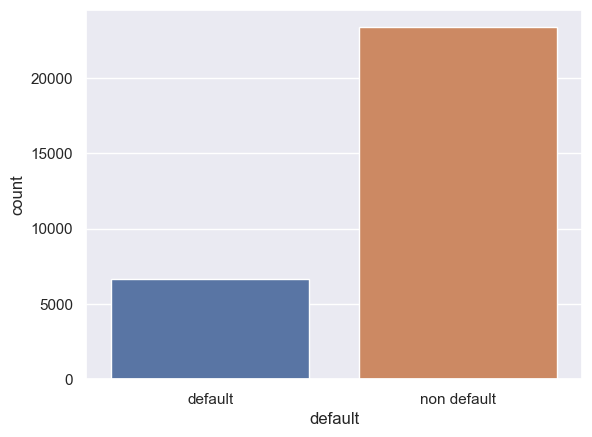

In [22]:
sns.set_theme()
sns.countplot(data.default.map({0:'non default',1:'default'}))

In [23]:
counts=data['default'].map({0:'non default',1:'default'}).value_counts()
percs=data['default'].map({0:'non default',1:'default'}).value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.concat([counts,percs],axis=1,keys=['count','percentage'])

,count,percentage
non default,23364,77.9%
default,6636,22.1%


#### As we found in default column their is 77.9% of non default customers and 22.1% of default customers

In [24]:
def percent(ax,feature):
    total=len(feature)
    for p in ax.patches:
        percentage='{:.1f}%'.format(100*p.get_height()/total)
        x=p.get_x()+p.get_width()/2-0.05
        y=p.get_y()+p.get_height()
        ax.annotate(percentage,(x,y),size=10)


In [25]:
counts=data['EDUCATION'].map({1:'school', 2:'univeristy', 3:'highschool', 4:'others'}).value_counts()
percs=data['EDUCATION'].map({1:'school', 2:'univeristy', 3:'highschool', 4:'others'}).value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.concat([counts,percs],axis=1,keys=['count','percentage'])


,count,percentage
univeristy,14030,46.8%
school,10585,35.3%
highschool,4917,16.4%
others,468,1.6%


#### In Education column we found 46.8% in University,35.3% in School,16.4% in High School,1.6% in others

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

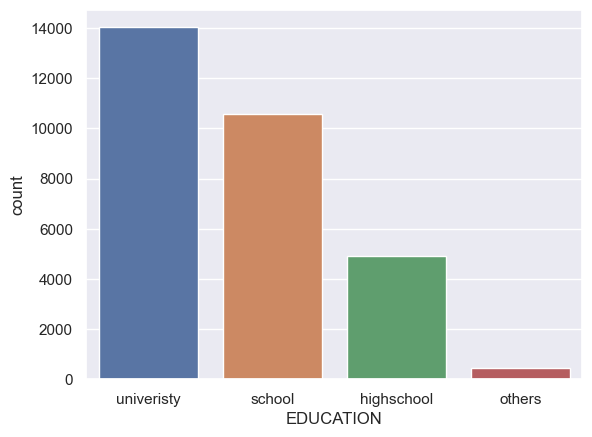

In [26]:
sns.set_theme()
sns.countplot(data.EDUCATION.map({1:'school', 2:'univeristy', 3:'highschool', 4:'others'}))

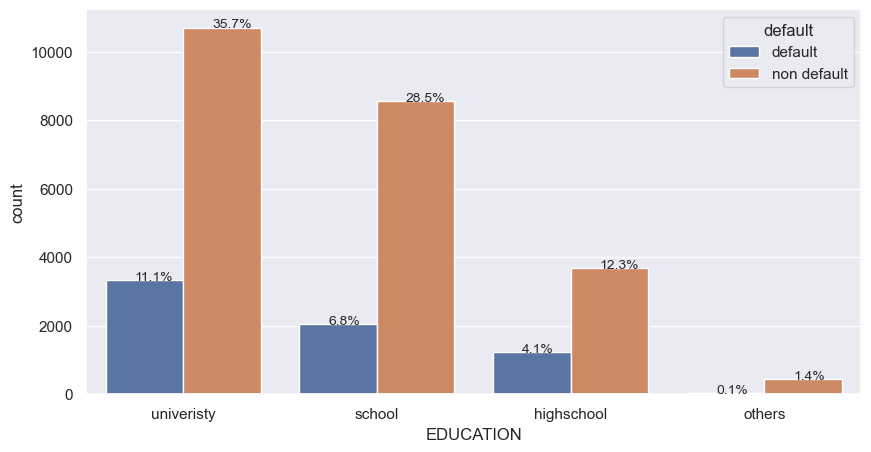

In [27]:
plt.figure(figsize=(10,5))
ax_education=sns.countplot(data.EDUCATION.map({1:'school', 2:'univeristy', 3:'highschool', 4:'others'}),
                 hue=data.default.map({0:'non default',1:'default'}),data=data)
percent(ax_education,data['default'])


#### among 46.8% in University their are 11.1% default customers and 35.7% non default customers,

#### 35.3% in School their are 6.8% of defaulter and 28.5% non defaulter,

#### 16.4% in High School thier are 4.1% defaulter and 12.3% non defaulter,

#### 1.6% in others

### As we observe that their are more non default customers when compared with default customers

In [28]:
counts=data['SEX'].map({1:'male',2:'female'}).value_counts()
percs=data['SEX'].map({1:'male',2:'female'}).value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.concat([counts,percs],axis=1,keys=['count','percentage'])

,count,percentage
female,18112,60.4%
male,11888,39.6%


#### Thier are 60.4% of female customers and 39.6% of male customers

### here we see that more credit card holders are female when compared with the male


<AxesSubplot:xlabel='SEX', ylabel='count'>

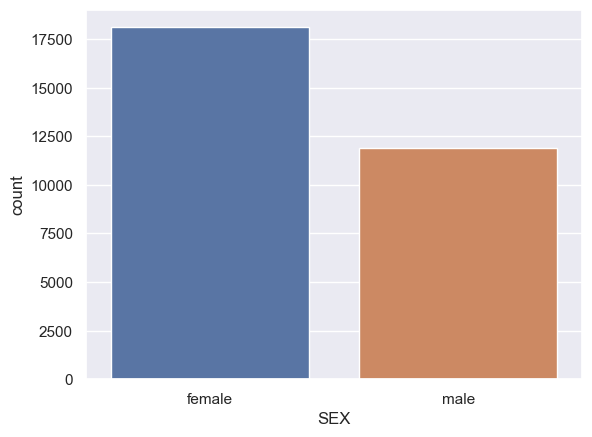

In [29]:
sns.countplot(data.SEX.map({1:'male',2:'female'}))

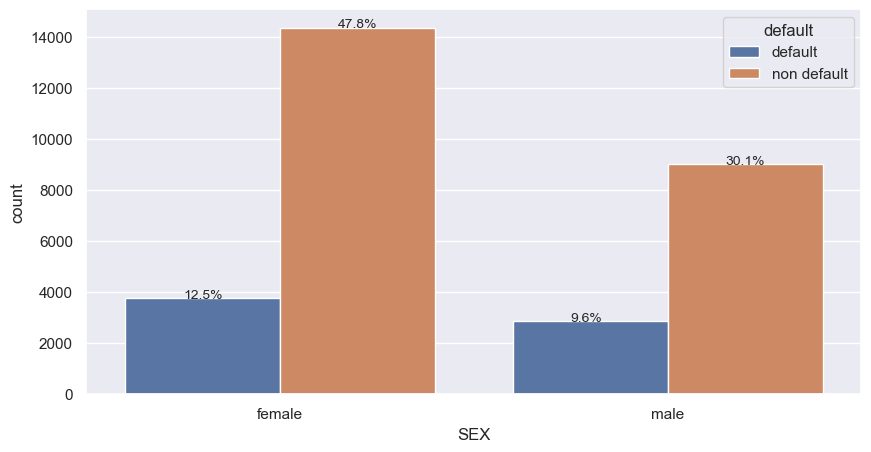

In [30]:
plt.figure(figsize=(10,5))
ax_gender=sns.countplot(data.SEX.map({1:'male',2:'female'}),hue=data.default.map({0:'non default',1:'default'}),data=data)
percent(ax_gender,data['default'])

#### Thier are 60.4% of female customers among 12.5% defaulter and 47.8% non defaulter
#### 39.6% of male customers among 9.6% defaulter and 30.1% non defaulter
### since the female credit card holder are more though the default customers are less when compared with the male customers


In [31]:
counts=data['MARRIAGE'].map({1:'married',2:'single',3:'divroce'}).value_counts()
percs=data['MARRIAGE'].map({1:'married',2:'single',3:'divroce'}).value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.concat([counts,percs],axis=1,keys=['count','percentage'])

,count,percentage
single,15964,53.2%
married,13659,45.5%
divroce,377,1.3%


#### Thier are 53.2% of single , 45.5% of married and 1.3% of divorce

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

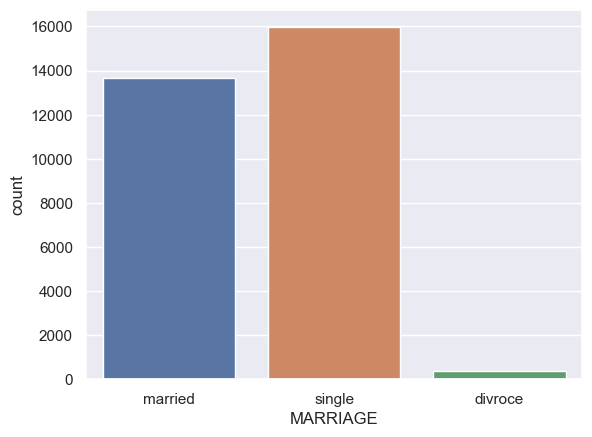

In [32]:
sns.countplot(data.MARRIAGE.map({1:'married',2:'single',3:'divroce'}))

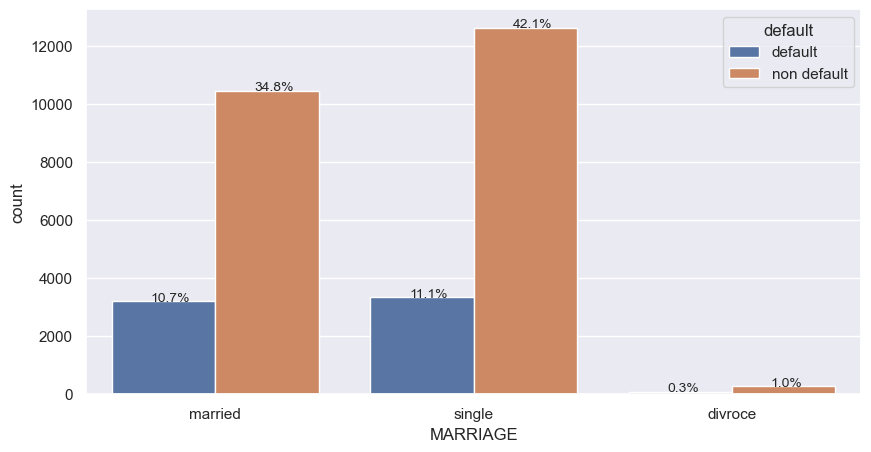

In [33]:
plt.figure(figsize=(10,5))
ax_marriage=sns.countplot(data.MARRIAGE.map({1:'married',2:'single',3:'divroce'}),
                          hue=data.default.map({0:'non default',1:'default'}),data=data)
percent(ax_marriage,data['default'])


### Their are more defaulter in married customers as compared with the others

In [34]:
pay=data[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay.describe()
#-1 pay duly,1=payment delay for one month,2 to 9 payment delayed wrt their months respectively

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


####  In dataset we are defined -1 for pay duly and 1 for payment delay in one month anf 2 to 9 are the payment delayed with respect to their resprective months


In [35]:
data['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

#### As we observe that their are undefined category classes like 0 and -2
#### So we decided to map the -2 ,-1,0 to category 0 which represent that the thier is no delay in the payment for better understanding


In [36]:
data['PAY_1']=data['PAY_1'].map({-2:0,-1:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9})
data['PAY_2']=data['PAY_2'].map({-2:0,-1:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9})
data['PAY_3']=data['PAY_3'].map({-2:0,-1:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9})
data['PAY_4']=data['PAY_4'].map({-2:0,-1:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9})
data['PAY_5']=data['PAY_5'].map({-2:0,-1:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9})
data['PAY_6']=data['PAY_6'].map({-2:0,-1:0,0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9})

In [37]:
data['PAY_1'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

### Distibution of classes of PAY_0 to PAY_6

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

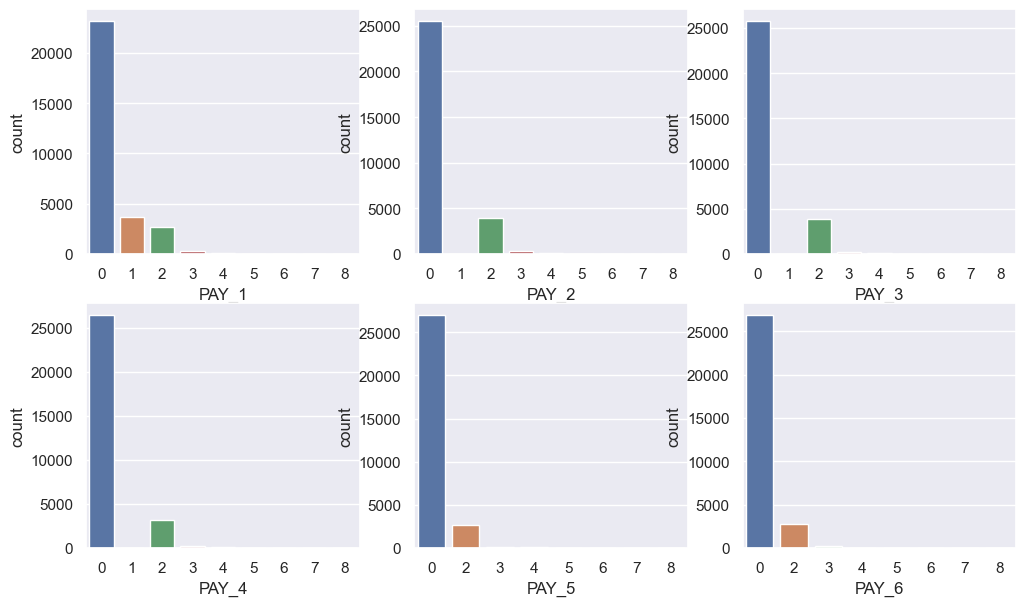

In [38]:
plt.figure(figsize=(12,7))
plt.subplot(2,3,1)
sns.countplot(data.PAY_1)
plt.subplot(2,3,2)
sns.countplot(data.PAY_2)
plt.subplot(2,3,3)
sns.countplot(data.PAY_3)
plt.subplot(2,3,4)
sns.countplot(data.PAY_4)
plt.subplot(2,3,5)
sns.countplot(data.PAY_5)
plt.subplot(2,3,6)
sns.countplot(data.PAY_6)

In [39]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

## Limit Balance

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

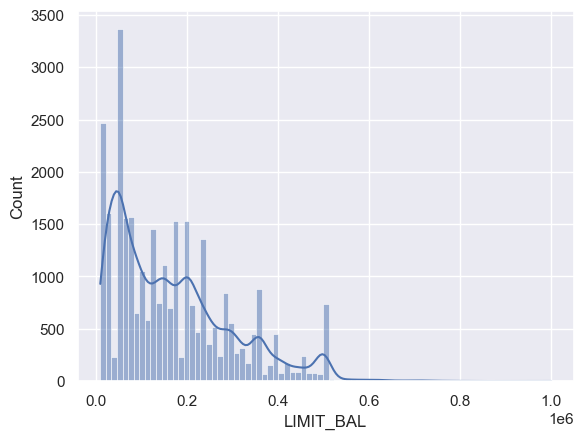

In [40]:
sns.histplot(data['LIMIT_BAL'],kde=True)

### As we observe that the limit balance amount lies between 0 to 0.4 in the histplot

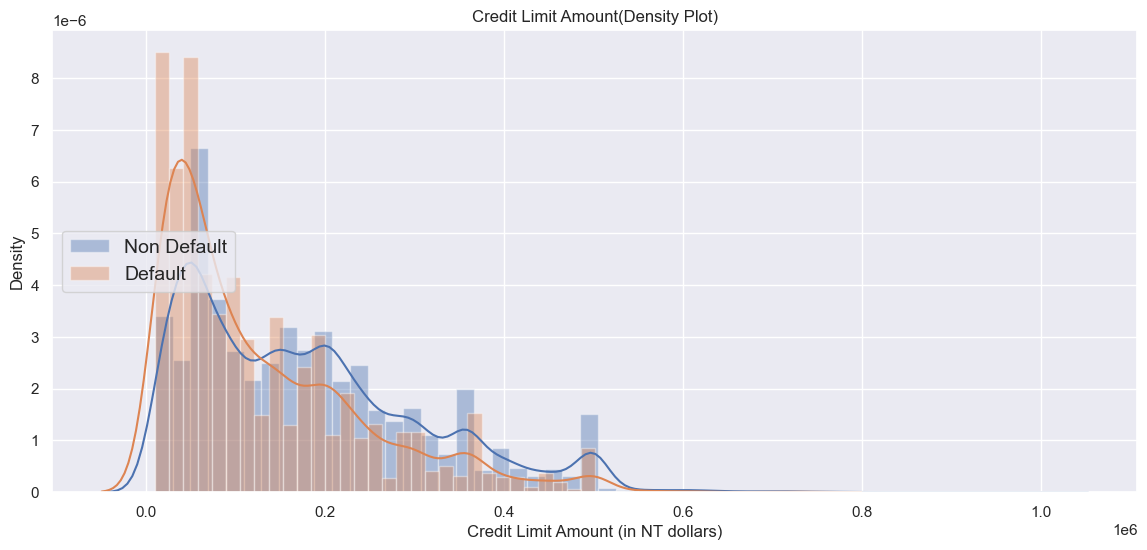

In [41]:
limit_0=data.loc[data['default']==0]['LIMIT_BAL']
limit_1=data.loc[data['default']==1]['LIMIT_BAL']
plt.figure(figsize=(14,6))
sns.distplot(limit_0,kde=True,label='Non Default')
sns.distplot(limit_1,kde=True,label='Default')
plt.legend(loc='center left',fontsize=14)
plt.title('Credit Limit Amount(Density Plot)')
plt.xlabel('Credit Limit Amount (in NT dollars)')
plt.show()

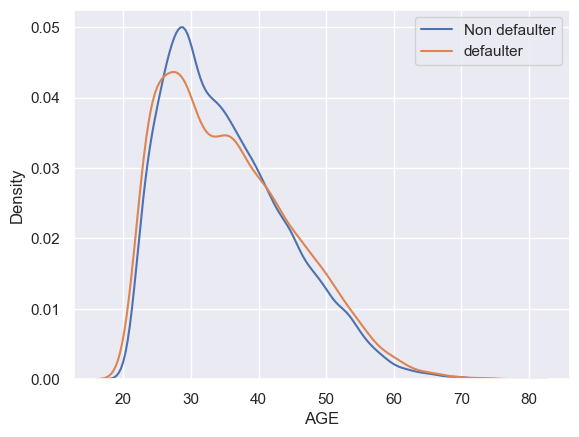

In [42]:
sns.kdeplot(data.loc[(data['default']==0),'AGE'],label='Non defaulter')
sns.kdeplot(data.loc[(data['default']==1),'AGE'],label='defaulter')
plt.legend()

### Here we observe that the data are more distributed between age group of 20 to 40

In [43]:
bill_amt=data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default']]

In [44]:
bill_amt.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,0.221200
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,0.415062
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,0.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,0.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,0.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,1.000000


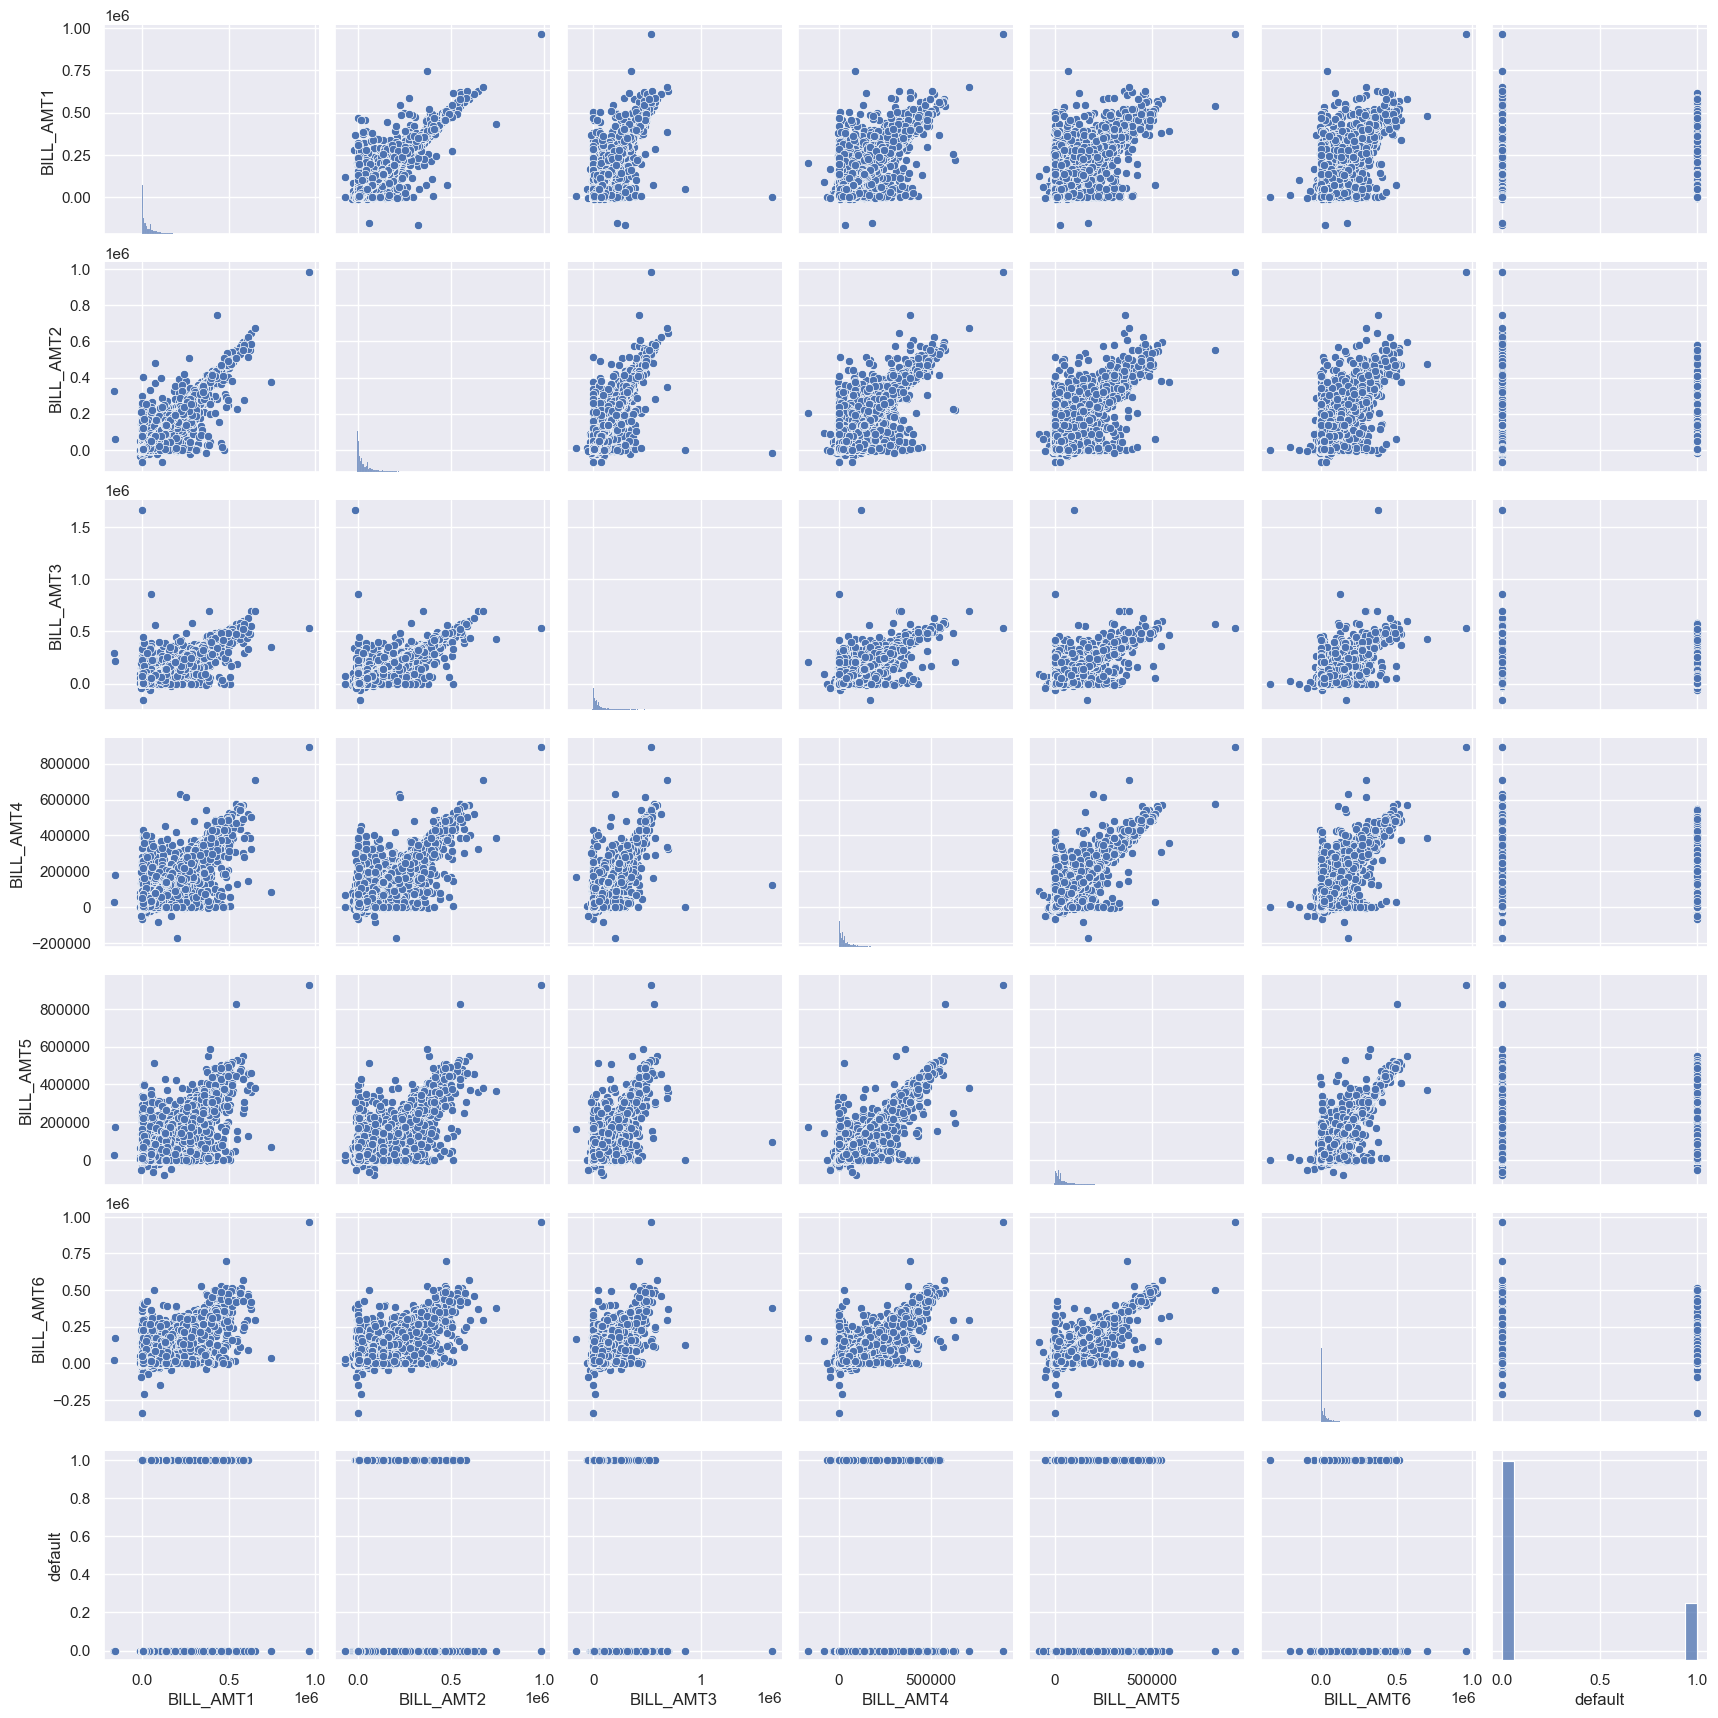

In [45]:
sns.pairplot(bill_amt)

###  Bill statement along with the target column

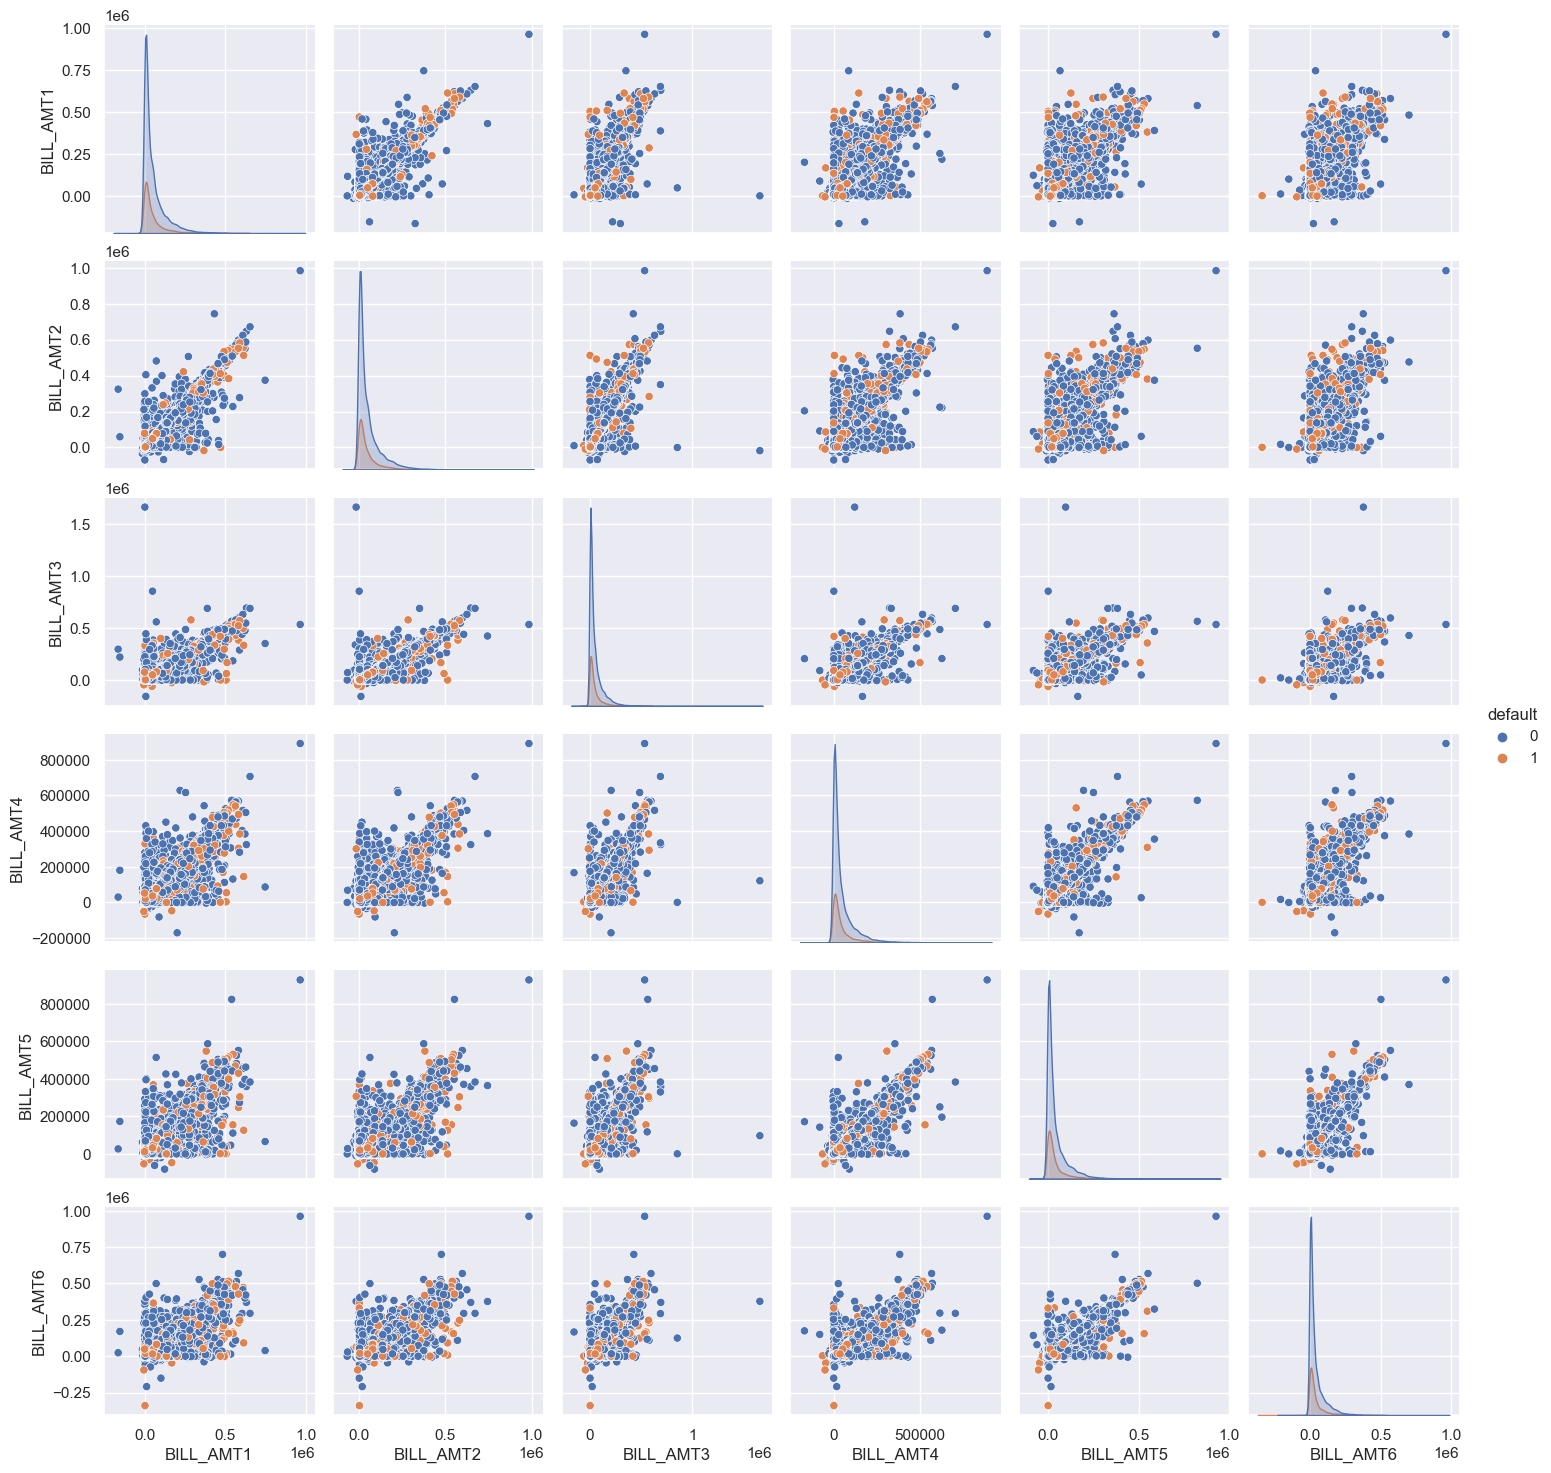

In [46]:
sns.pairplot(bill_amt,hue='default')

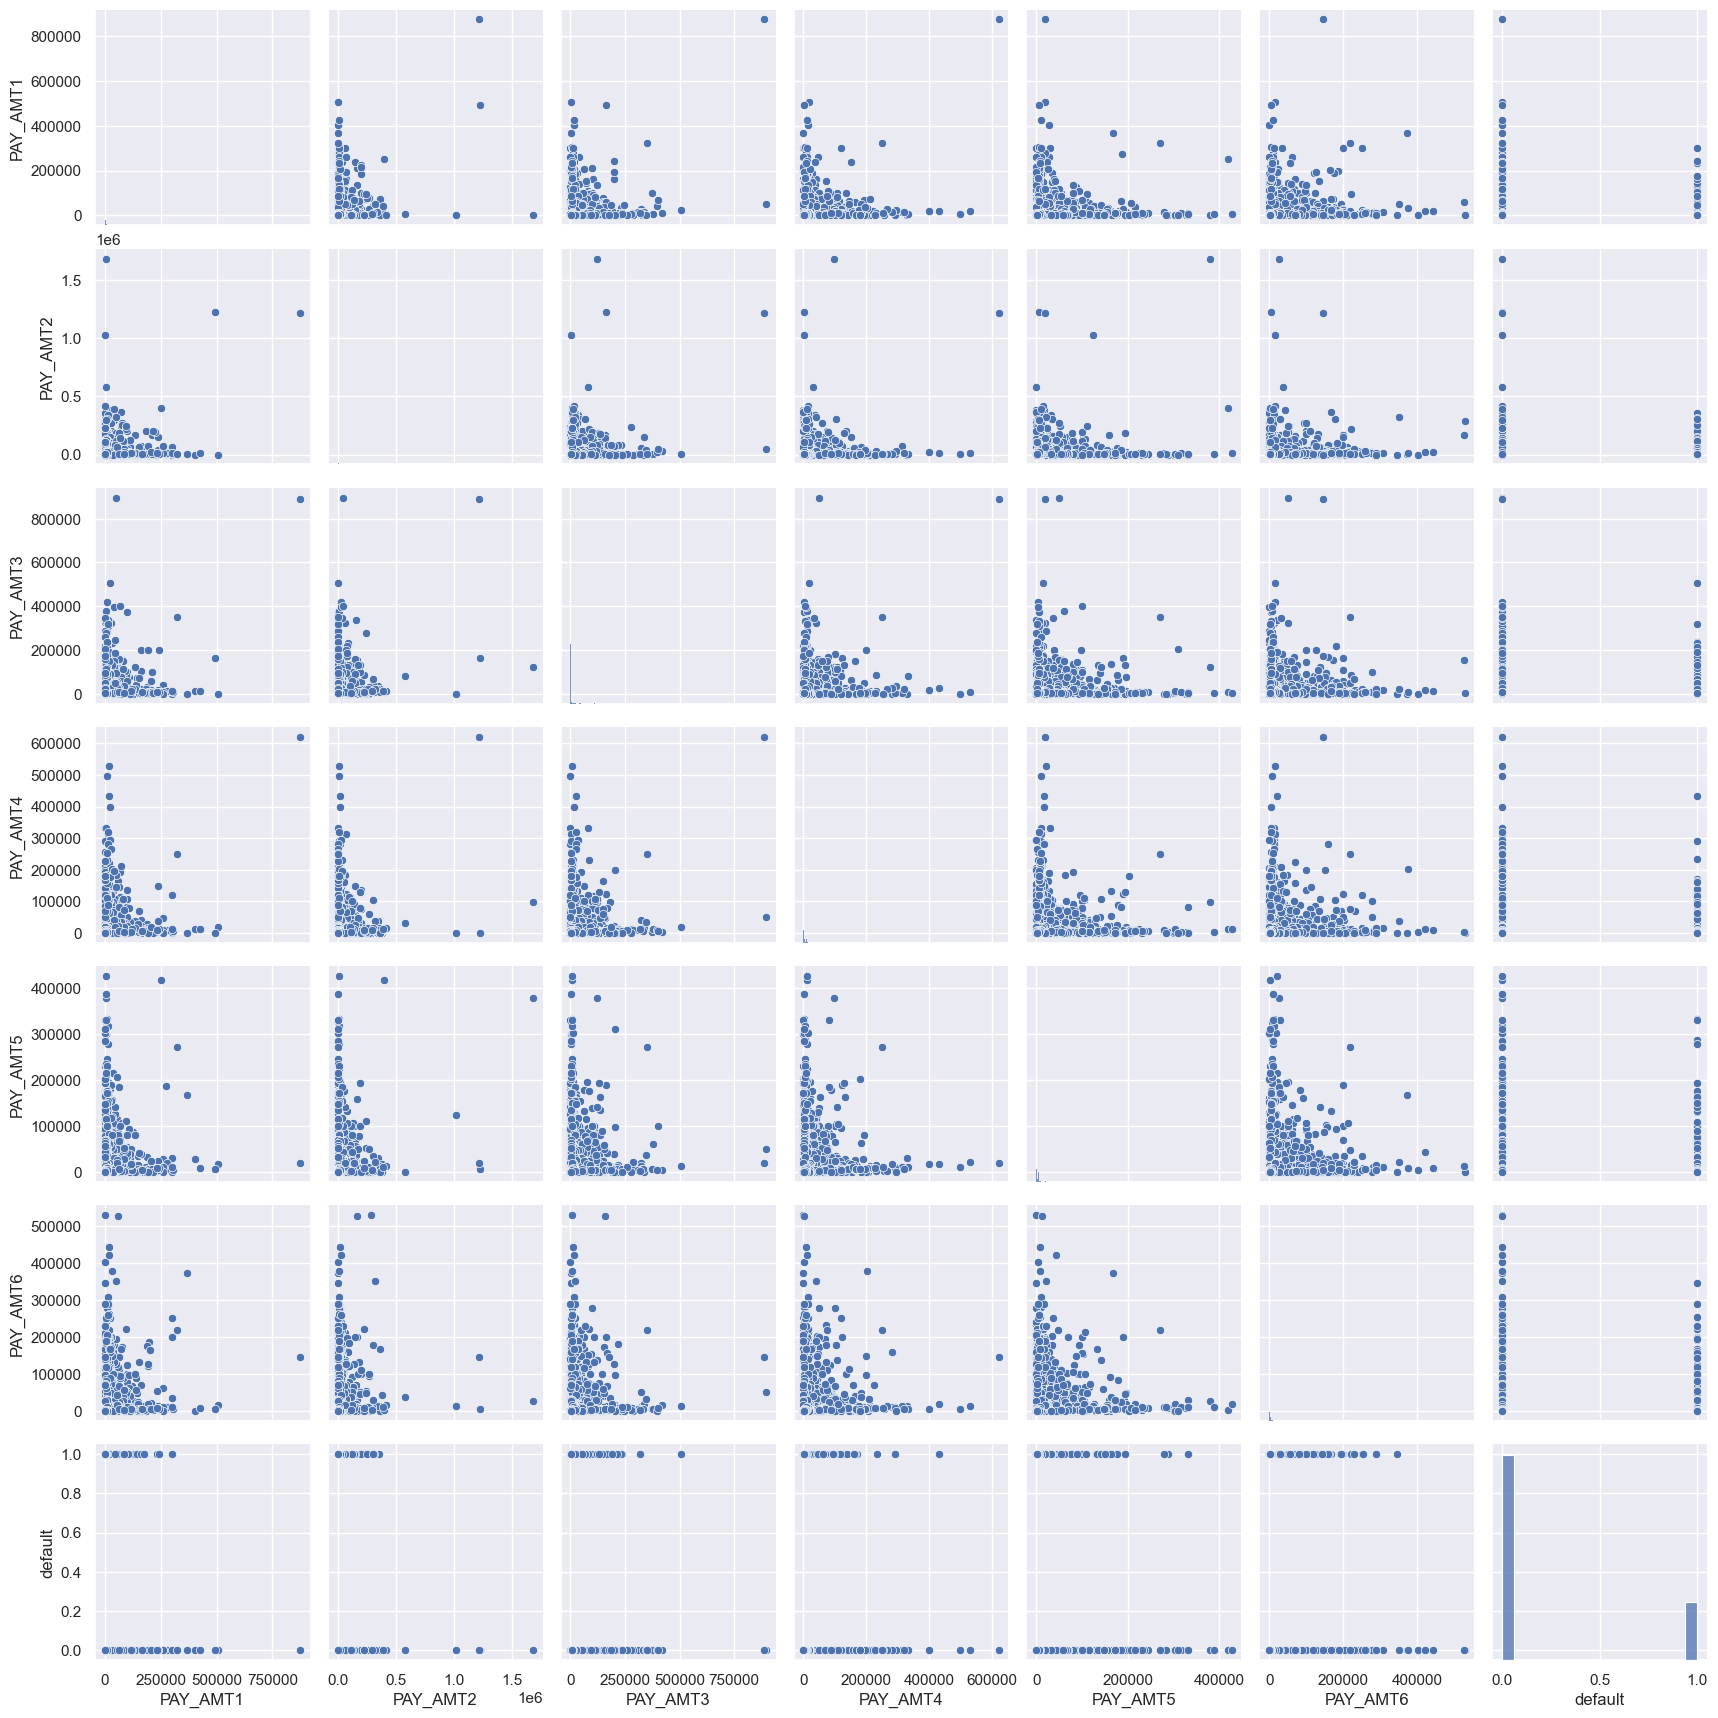

In [47]:
pay_amt=data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default']]
sns.pairplot(pay_amt)

### Previous month amount payment with Target column

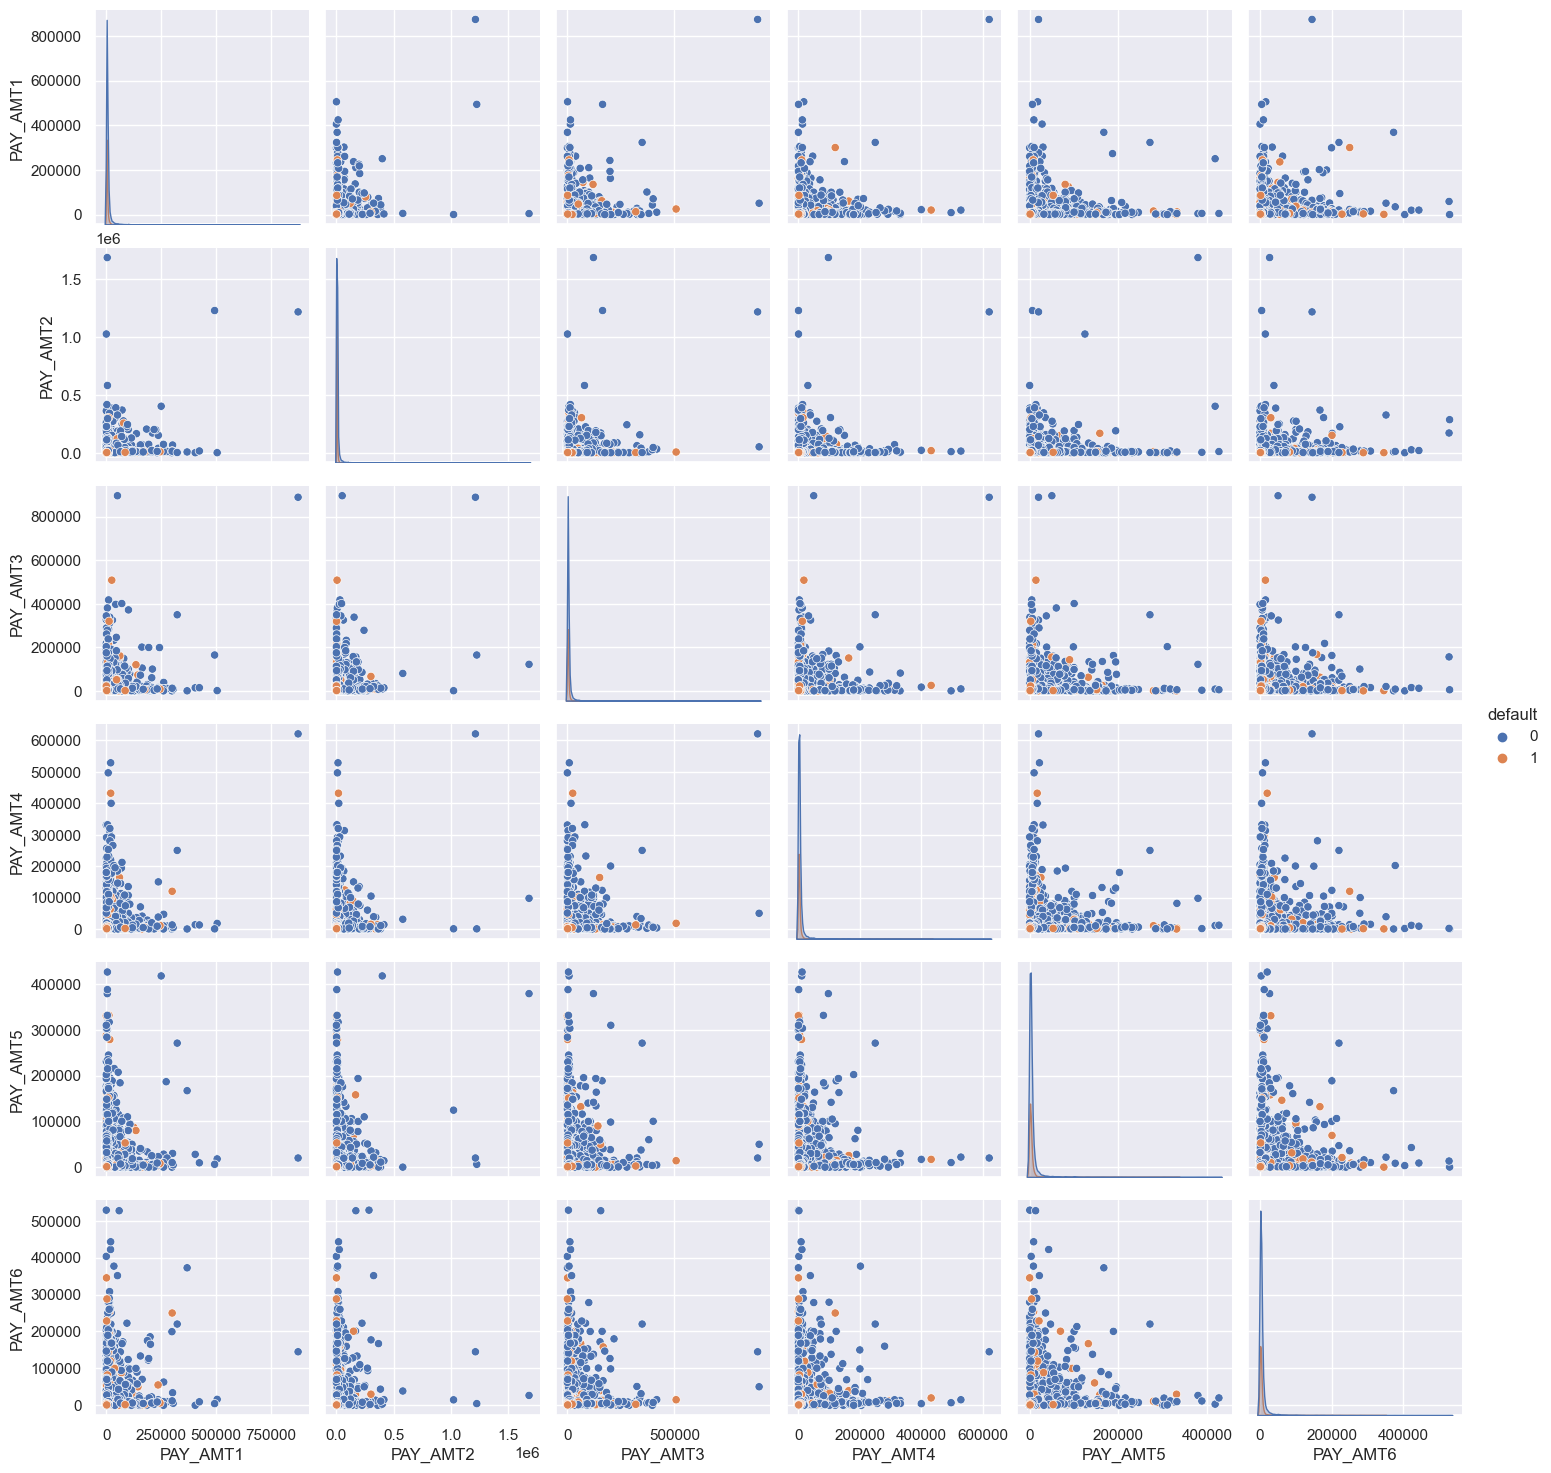

In [48]:
sns.pairplot(pay_amt,hue='default')

### Correlation Among Non Categorical Column

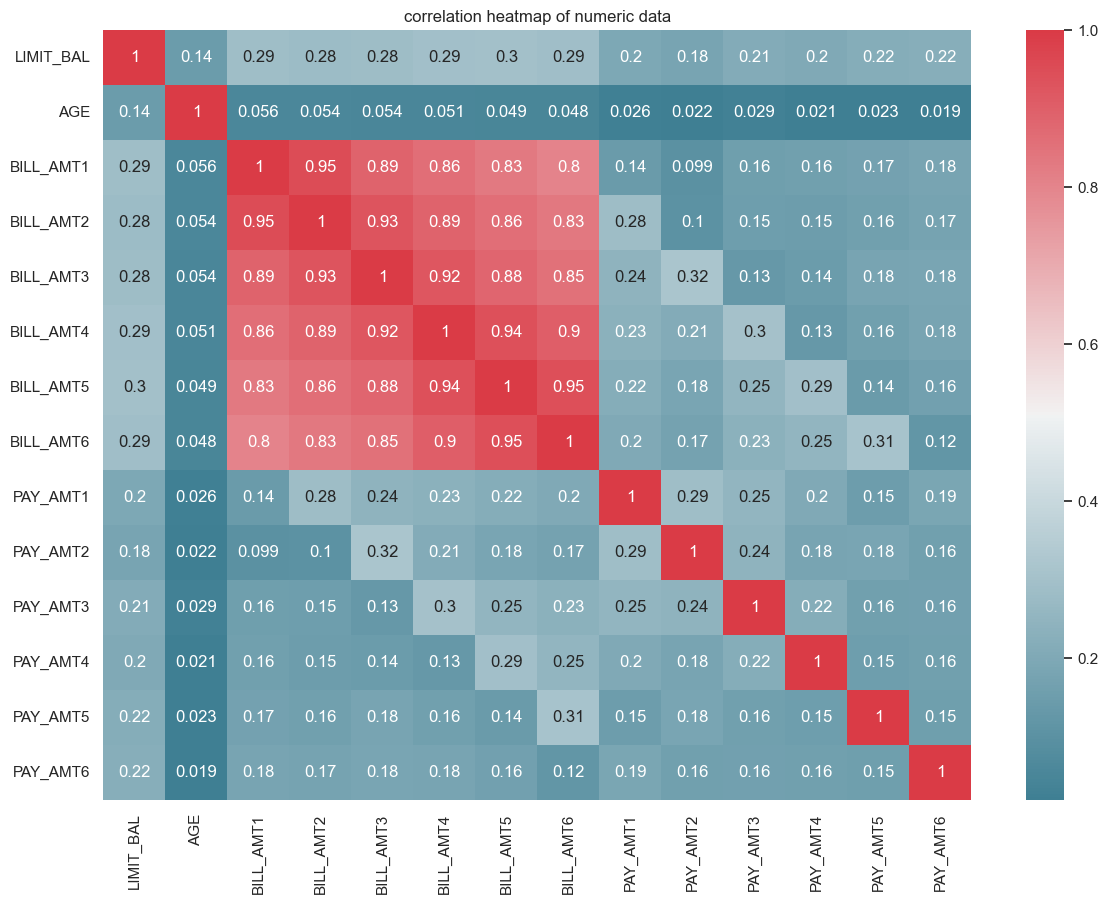

In [49]:
data1=data.drop(['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default'],axis=1)
corr=data1.corr()
plt.figure(figsize=(14,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap)
plt.title("correlation heatmap of numeric data")
plt.show()

In [50]:
logger.info('EDA ENDS!')

#### Here observe that expect bill statements columns all others columns are showing less correlated with others and the bill statement columns are quite correlated among themselves

#### As we observe that our dataset is imbalanced before building the model we need to balance the data

In [51]:
logger.info('HANDALING IMBALANCED DATA STARTS!')

## Handling Imbalance Data
--- As in the target column we observe that classes are imbalanced that is their are more customers which are not a defaulter ,when we try to build the model , prediction will be more on non default customers and thier is less chance that the model will predict the defaulter so data balancing is important


Here We are using Smote techinque where it upsampling the data


In [52]:
logger.info('HANDLING IMBALANCED DATA - OVER SAMPLING STARTS!')

In [53]:
smote=SMOTE()

In [54]:
X=data.drop(['default'],axis=1)
Y=data['default']

In [55]:
x_smote, y_smote = smote.fit_resample(X, Y)

In [56]:
final_data= pd.DataFrame(x_smote, columns=data.columns[:-1])
final_data['default'] = y_smote

In [57]:
final_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,178061.760524,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1
46724,20000.0,1,2,1,36,0,0,0,0,0,...,15733.013865,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1
46725,30000.0,2,3,1,31,1,2,2,0,0,...,343.706949,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11587.432615,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1


<AxesSubplot:xlabel='default', ylabel='count'>

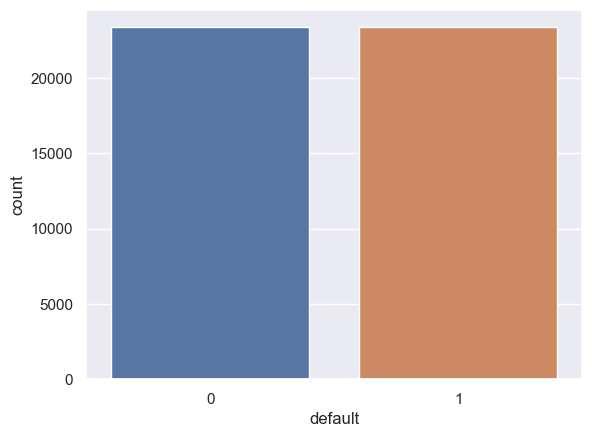

In [58]:
sns.set_theme()
sns.countplot(final_data.default)

In [59]:
final_data.default.value_counts()

1    23364
0    23364
Name: default, dtype: int64

In [60]:
logger.info('HANDLING IMBALANCED DATA - OVER SAMPLING ENDS!')

#### After Balancing the data here we find the data that both defaulter and non defaulter are of same count

In [61]:
final_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,178061.760524,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1
46724,20000.0,1,2,1,36,0,0,0,0,0,...,15733.013865,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1
46725,30000.0,2,3,1,31,1,2,2,0,0,...,343.706949,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11587.432615,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1


In [62]:
final_data.to_csv('Final_Data.csv', index=False)

In [63]:
data1=pd.read_csv('Final_Data.csv')

In [64]:
data1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,2,2,2,26,0,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.0,1,2,1,57,0,0,0,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,200000.0,1,1,1,28,1,2,0,0,0,...,178061.760524,169826.479103,161181.254660,331.456449,8652.220078,8057.052604,5633.250287,6111.207571,5079.317581,1
46724,20000.0,1,2,1,36,0,0,0,0,0,...,15733.013865,16419.781590,17093.773667,1541.276638,1249.659827,1037.346115,943.842509,947.023845,1058.785551,1
46725,30000.0,2,3,1,31,1,2,2,0,0,...,343.706949,414.927028,379.316988,1679.757550,0.000000,343.706949,414.927028,343.706949,343.706949,1
46726,50000.0,1,2,1,41,2,0,0,0,0,...,11587.432615,11913.505768,13340.739479,1635.860768,1401.234839,1024.654945,722.104270,1729.647409,315.527759,1
